In [21]:
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline
import os
os.chdir('/root/proj_kaggle_salt')

Populating the interactive namespace from numpy and matplotlib


In [22]:
log_path = 'runs/debug/'
log_file = 'train_0.log'
sl =350
logs = pd.read_json(log_path+log_file, lines=True)

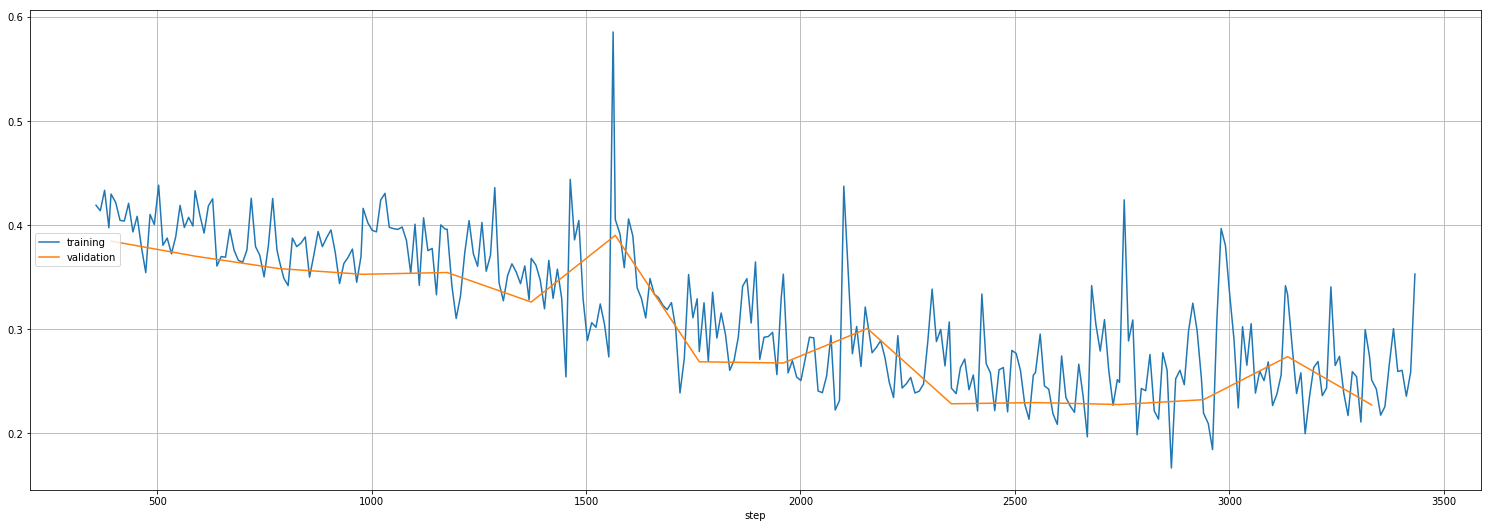

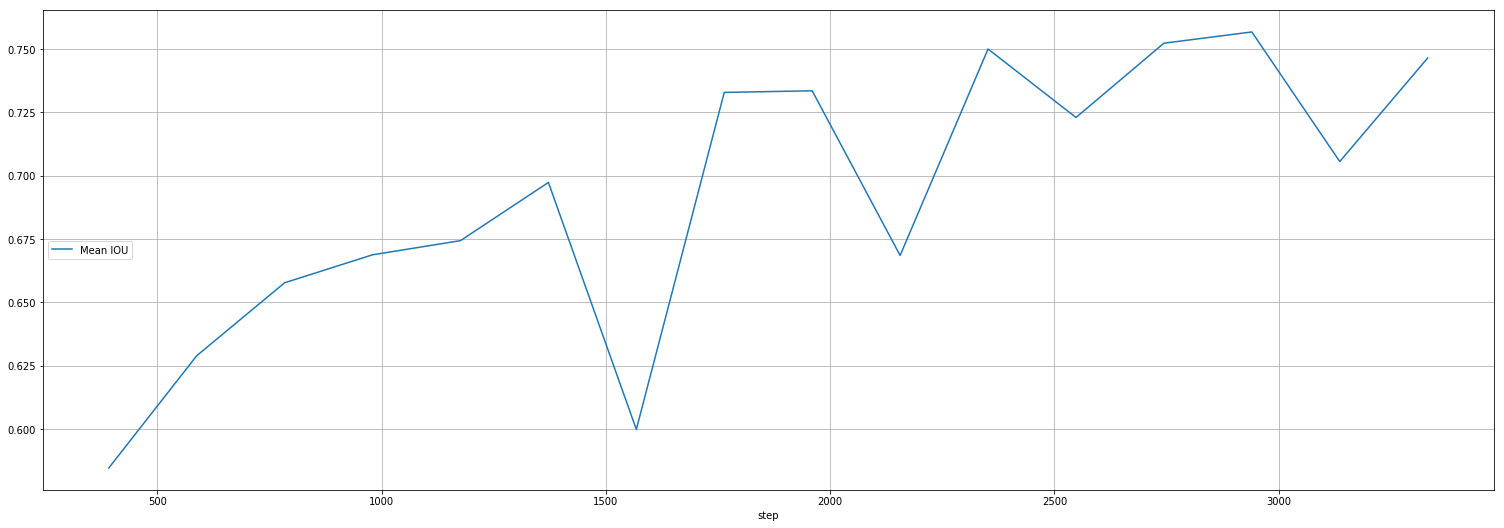

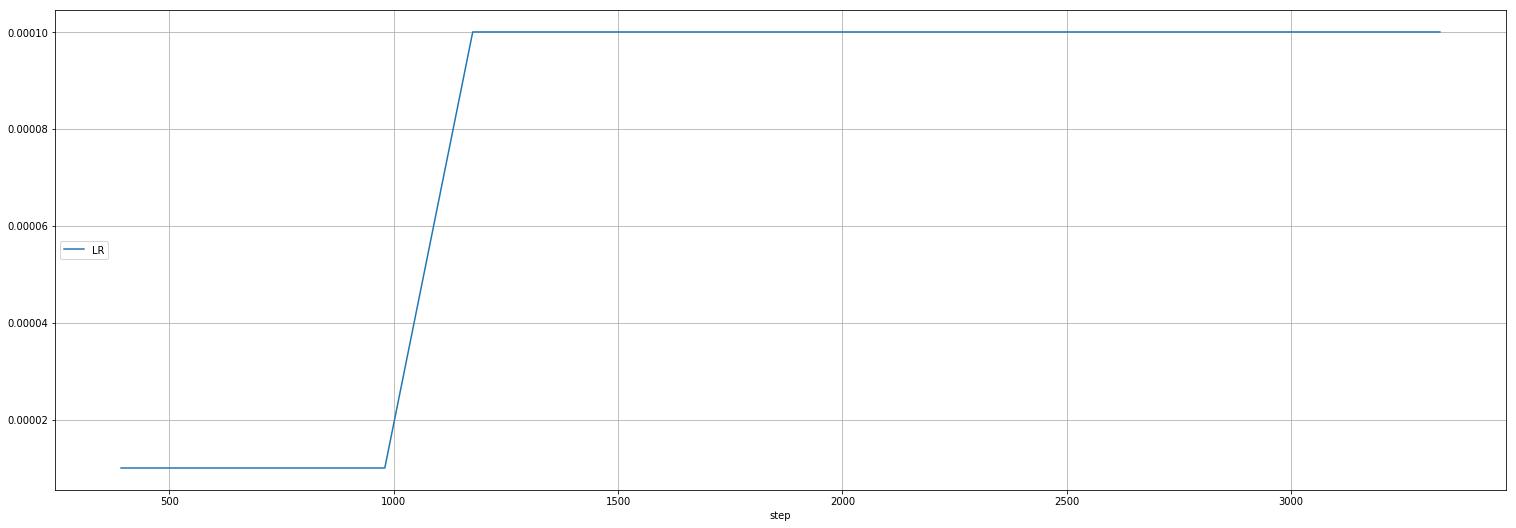

In [26]:
plt.figure(figsize=(26,30))
plt.subplot(311)
plt.plot(logs.step[(logs.loss.isna() == False) & (logs.step > sl)],
            logs.loss[(logs.loss.isna() == False) & (logs.step > sl)],
            label="training")
            
plt.plot(logs.step[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            logs.valid_loss[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            label = "validation")
         
plt.xlabel('step')
plt.legend(loc='center left')
plt.grid(True)        
plt.show();

plt.figure(figsize=(26,30))
plt.subplot(312)
            
#plt.plot(logs.step[(logs.valid_loss.isna() == False) & (logs.step > sl)],
#            logs.jaccard[(logs.valid_loss.isna() == False) & (logs.step > sl)],
#            label = "jaccard")

plt.plot(logs.step[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            logs.mean_iou2[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            label = "Mean IOU")
         
plt.xlabel('step')
plt.legend(loc='center left')
plt.grid(True)        
plt.show();

plt.figure(figsize=(26,30))
plt.subplot(312)
plt.plot(logs.step[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            logs.lr[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            label = "LR")
plt.xlabel('step')
plt.legend(loc='center left')
plt.grid(True)        
plt.show();




In [27]:
logs.mean_iou2.max()

0.7567258883248731